# Task 1.2: Apply Quantum Operations (Part 3)
## Objective 2: The QuantumCircuit Object

**Overview:**
This notebook focuses on manipulating the `QuantumCircuit` class itself, rather than specific gates.
*   **Circuit Construction:** Initialization, Composition, and Decompositions.
*   **Control Flow:** If/Else, For Loops, and Switch statements.
*   **Circuit Metrics:** Depth, Width, and Timing.

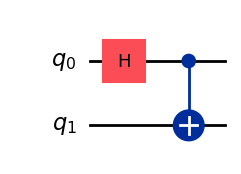

In [18]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a text drawing of the circuit.
qc.draw('mpl')

Core attribute is Data

In [19]:
print(qc.data)

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())]


global phase

In [20]:
print(qc.global_phase)

0.0


Quantum and Classical Registers

In [21]:
print(qc.qregs)
print(qc.cregs)

[QuantumRegister(2, 'q')]
[]


Layout

In [22]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler import generate_preset_pass_manager
 
# Create circuit to test transpiler on
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.swap(1, 2)
qc.cx(0, 1)
 
# Add measurements to the circuit
qc.measure([0, 1, 2], [0, 1, 2])
 
# Specify the QPU to target
backend = GenericBackendV2(3)
 
# Transpile the circuit
pass_manager = generate_preset_pass_manager(
optimization_level=1, backend=backend
)
transpiled = pass_manager.run(qc)
 
# Print the layout after transpilation
print(transpiled.layout.routing_permutation())

[0, 1, 2]


Create Circuits
* Init
* Copy
* Copy Empty Like
* from Instruction
* from qasm file
* from qasm string

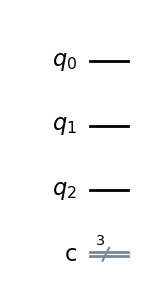

In [23]:
qc2 = qc.copy_empty_like()
qc2.draw('mpl')

Data Objects
* add_bits
* add_register
* add_var
* add_stretch
* add_input
* add_capture
* add_uninitialized_var

In [24]:
from qiskit.circuit import QuantumCircuit
 
qc = QuantumCircuit(2)
my_var = qc.add_var("my_var", False)

Working with bits

In [25]:
from qiskit.circuit import QuantumCircuit, Qubit
 
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])
 
# The `.qubits` and `.clbits` fields are not integers.
assert isinstance(qc.data[0].qubits[0], Qubit)
# ... but we can use `find_bit` to retrieve them.
assert qc.find_bit(qc.data[0].qubits[0]).index == 0
 
simple = [
    (
        instruction.operation.name,
        [qc.find_bit(bit).index for bit in instruction.qubits],
        [qc.find_bit(bit).index for bit in instruction.clbits],
    )
    for instruction in qc.data
]

Adding Operations

* append
* _append
* compose
* tensor


In [26]:
qc2.x(0)
qc.tensor(qc2).draw()

┌───┐                   
q_0: ┤ X ├───────────────────
     └───┘                   
q_1: ────────────────────────
                             
q_2: ────────────────────────
     ┌───┐          ┌─┐      
q_3: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_4: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_5: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 6/════════════════╩══╩══╩═
                     3  4  5

Methods to add standard instructions

special non-unitary

* barrier
* delay
* initialize
* measure
* reset
* store

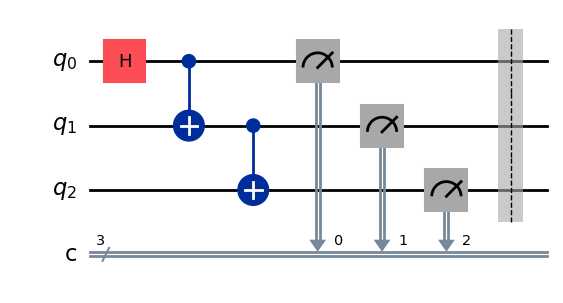

In [27]:
qc.barrier()

qc.draw('mpl')

Uncontrolled unitary Gate

* dcx
* ecr
* h
* id
* iswap
* ms
* p
* pauli
* prepare_state
* r
* rcccx
* rccx
* rv
* rx
* rxx
* ry
* ryy
* rz
* rzx
* rzz
* s
* sdg
* swap
* sx
* sxdg
* t
* tdg
* u
* unitary
* x
* y
* z

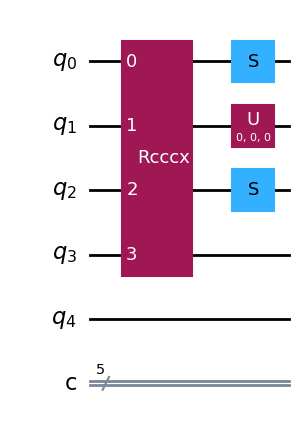

In [28]:
qc = QuantumCircuit(5,5)

qc.rcccx(0,1,2,3)
qc.s([0,2])
qc.u(0,0,0,1)

qc.draw('mpl')

Controlled Unitary Gates

* ccx
* ccz
* ch 
* cp
* crx
* cry
* crz
* cs
* csdg
* cswap
* csx
* cu
* cx
* cy
* cz

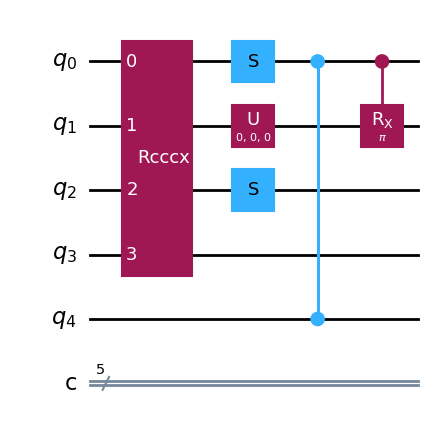

In [29]:
qc.cz(0,4)
qc.crx(np.pi,0,1)


qc.draw('mpl')

Multiply Controlled Gates

* mcp
* mcrx
* mcry
* mcrz
* mcx

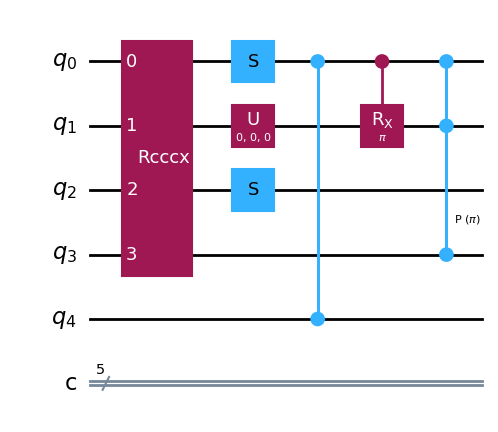

In [30]:
qc.mcp(np.pi,[0,1],3)

qc.draw('mpl')

Adding Control Flow to circuits


* if_test
* if_else
* while_loop
* switch
* for_loop
* box
* break_loop
* continue_loop

In [31]:
from qiskit.circuit import QuantumCircuit, BoxOp
 
body_0 = QuantumCircuit(4)
body_0.cz(0, 1)
body_0.cz(2, 3)
 
# Note that the qubit indices inside a body related only to the body.  The
# association with qubits in the containing circuit is made by the ``qubits``
# argument to `QuantumCircuit.box`.
body_1 = QuantumCircuit(5)
body_1.cz(0, 1)
body_1.cz(2, 3)
 
qc = QuantumCircuit(9)
qc.box(body_0, [0, 1, 2, 3], [])
qc.box(body_1, [4, 5, 6, 7, 8], [])

qc.draw()

┌───────     ───────┐                       
q_0: ┤        ─■─        ├───────────────────────
     │         │         │                       
q_1: ┤        ─■─        ├───────────────────────
     │ Box-0       End-0 │                       
q_2: ┤        ─■─        ├───────────────────────
     │         │         │                       
q_3: ┤        ─■─        ├───────────────────────
     └───────     ───────┘ ┌───────     ───────┐ 
q_4: ──────────────────────┤        ─■─        ├─
                           │         │         │ 
q_5: ──────────────────────┤        ─■─        ├─
                           │                   │ 
q_6: ──────────────────────┤ Box-0  ─■─  End-0 ├─
                           │         │         │ 
q_7: ──────────────────────┤        ─■─        ├─
                           │                   │ 
q_8: ──────────────────────┤        ───        ├─
                           └───────     ───────┘

In [32]:
from qiskit.circuit import QuantumCircuit
 
 
qc = QuantumCircuit(9)
with qc.box():
    qc.cz(0, 1)
    qc.cz(2, 3)
with qc.box():
    qc.cz(4, 5)
    qc.cz(6, 7)
    qc.noop(8)

qc.draw()

┌───────     ───────┐                       
q_0: ┤        ─■─        ├───────────────────────
     │         │         │                       
q_1: ┤        ─■─        ├───────────────────────
     │ Box-0       End-0 │                       
q_2: ┤        ─■─        ├───────────────────────
     │         │         │                       
q_3: ┤        ─■─        ├───────────────────────
     └───────     ───────┘ ┌───────     ───────┐ 
q_4: ──────────────────────┤        ─■─        ├─
                           │         │         │ 
q_5: ──────────────────────┤        ─■─        ├─
                           │                   │ 
q_6: ──────────────────────┤ Box-0  ─■─  End-0 ├─
                           │         │         │ 
q_7: ──────────────────────┤        ─■─        ├─
                           │                   │ 
q_8: ──────────────────────┤        ───        ├─
                           └───────     ───────┘

In [33]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)
 
with qc.for_loop(range(5)) as i:
    qc.x(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    with qc.if_test((0, True)):
        qc.break_loop()

qc.draw()

C:\QC\venvs\sandbox\.venv\Lib\site-packages\qiskit\visualization\circuit\circuit_visualization.py:276: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  if check_clbit_in_inst(block, cregbundle) is False:


┌─────────────────── ┌───┐     ┌─┐┌────── ┌─────────────┐ ───────┐ »
q_0: ┤                    ┤ X ├──■──┤M├┤       ┤1            ├        ├─»
     │ For-0 range(0, 5)  └───┘┌─┴─┐└╥┘│ If-1  │             │  End-1 │ »
q_1: ┤                    ─────┤ X ├─╫─┤       ┤0 Break_loop ├        ├─»
     └───────────────────      └───┘ ║ └──╥─── │             │ ───────┘ »
  c: ════════════════════════════════╩════■════╡0            ╞══════════»
                                               └─────────────┘          »
«      ───────┐ 
«q_0:         ├─
«       End-0 │ 
«q_1:         ├─
«      ───────┘ 
«  c: ══════════
«

In [34]:
from qiskit.circuit import QuantumCircuit
 
qc = QuantumCircuit(3)
with qc.box():
    # This control-flow block will only use qubits 0 and 1.
    qc.cx(0, 1)
with qc.box():
    # This control-flow block will contain only the same operation as the previous
    # block, but it will also mark qubit 2 as "used" by the box.
    qc.cx(0, 1)
    qc.noop(2)

Converting circuits to single objects

* to_instruction
* to_gate

In [35]:
instructions_list = qc2.to_instruction()
print(instructions_list)

qc3= QuantumCircuit(3)

qc3.x(0)
qc3.measure_active()
qc3.draw()

gates=qc3.to_gate()
print(gates)

Instruction(name='circuit-165', num_qubits=3, num_clbits=3, params=[])


QiskitError: 'Circuit with classical bits cannot be converted to gate.'

Helper mutation Methods

* measure_active
* measure_all
* clear
* remove_final_measurments

In [36]:
qc3= QuantumCircuit(3)

qc3.h(0)
qc3.cx(0,2)
qc3.measure_active()
qc3.draw()


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘  │   ░ └╥┘   
   q_1: ───────┼───░──╫────
             ┌─┴─┐ ░  ║ ┌─┐
   q_2: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [37]:
qc3.remove_final_measurements()
qc3.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────┼──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘

Simple Circuit Metrics



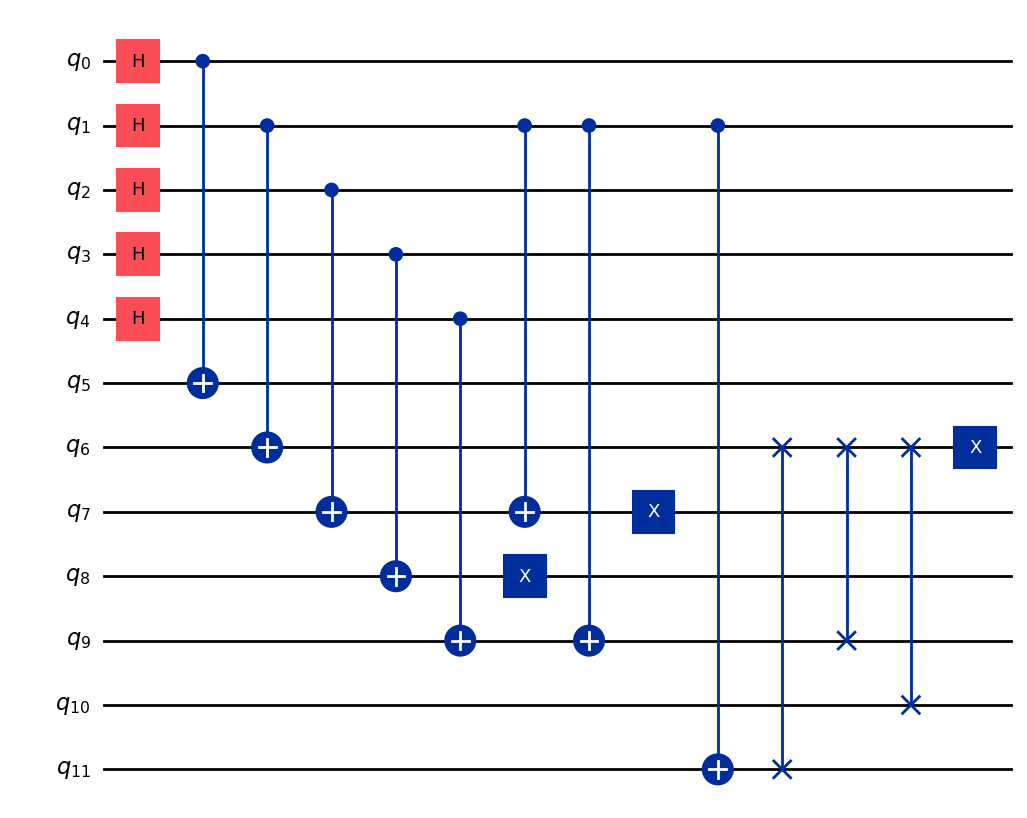

In [38]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)
 
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw('mpl')

In [39]:
assert qc.width() == 12

In [40]:
assert qc.num_qubits == 12

In [41]:
qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

Accessing Scheduling Information

* estimate_duration
* qubit_duration
* qubit_start_time
* qubit_stop_time

Instruction-like methods

* control
* inverse


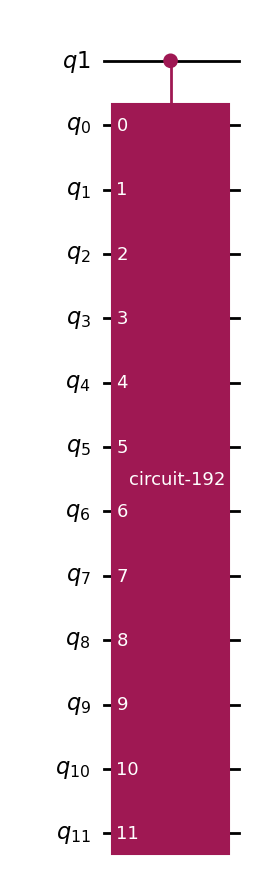

In [43]:
qc.control(1).draw('mpl')

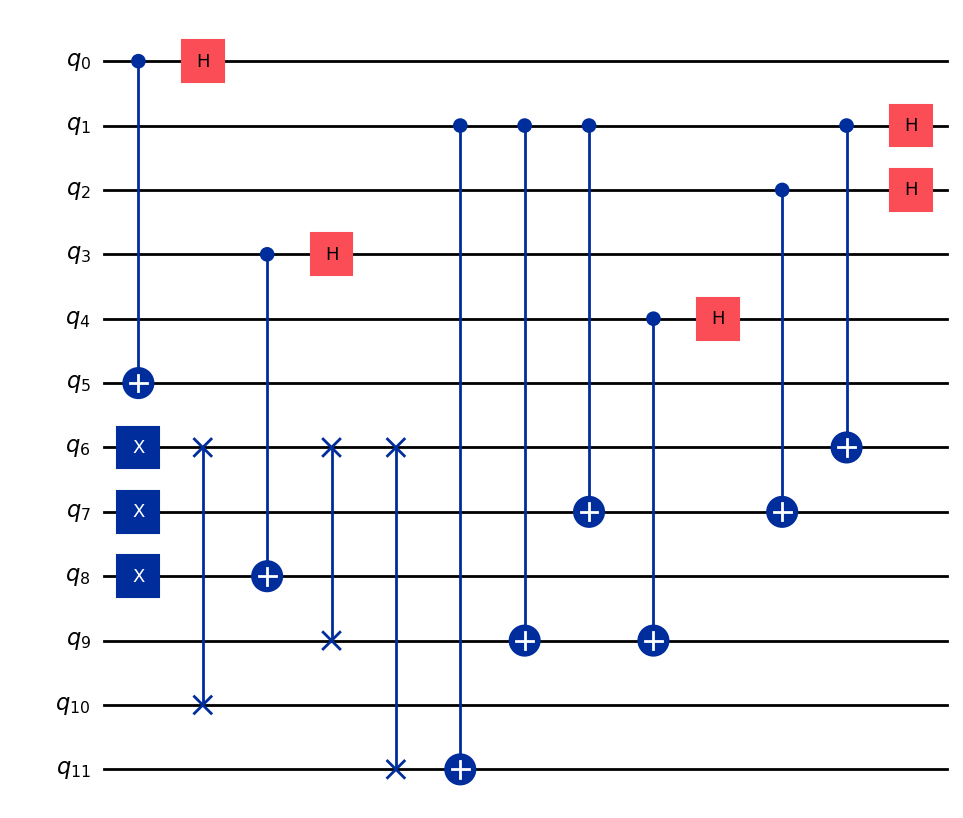

In [44]:
qc.inverse().draw('mpl')

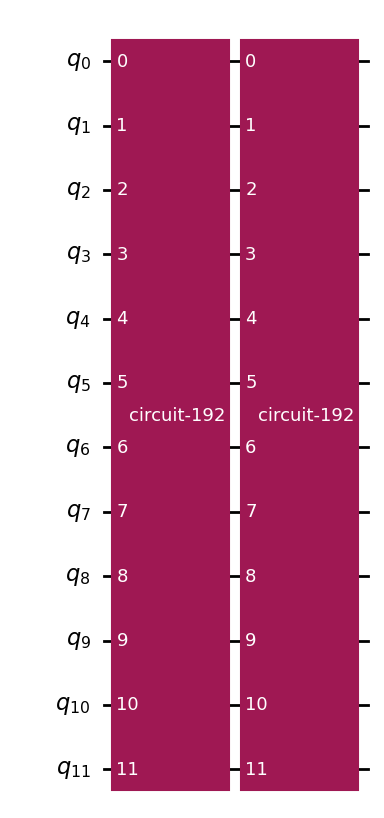

In [45]:
qc.power(2).draw('mpl')

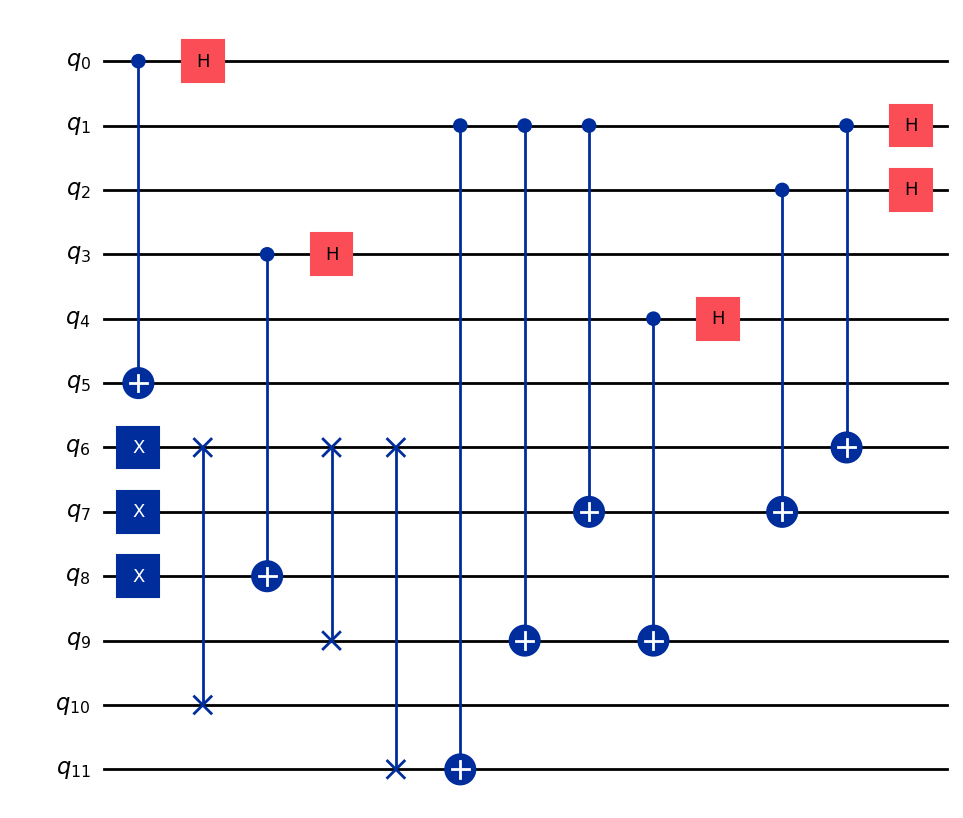

In [46]:
qc.reverse_ops().draw('mpl')

Visualization

* draw
* decompose
* reverse_bits

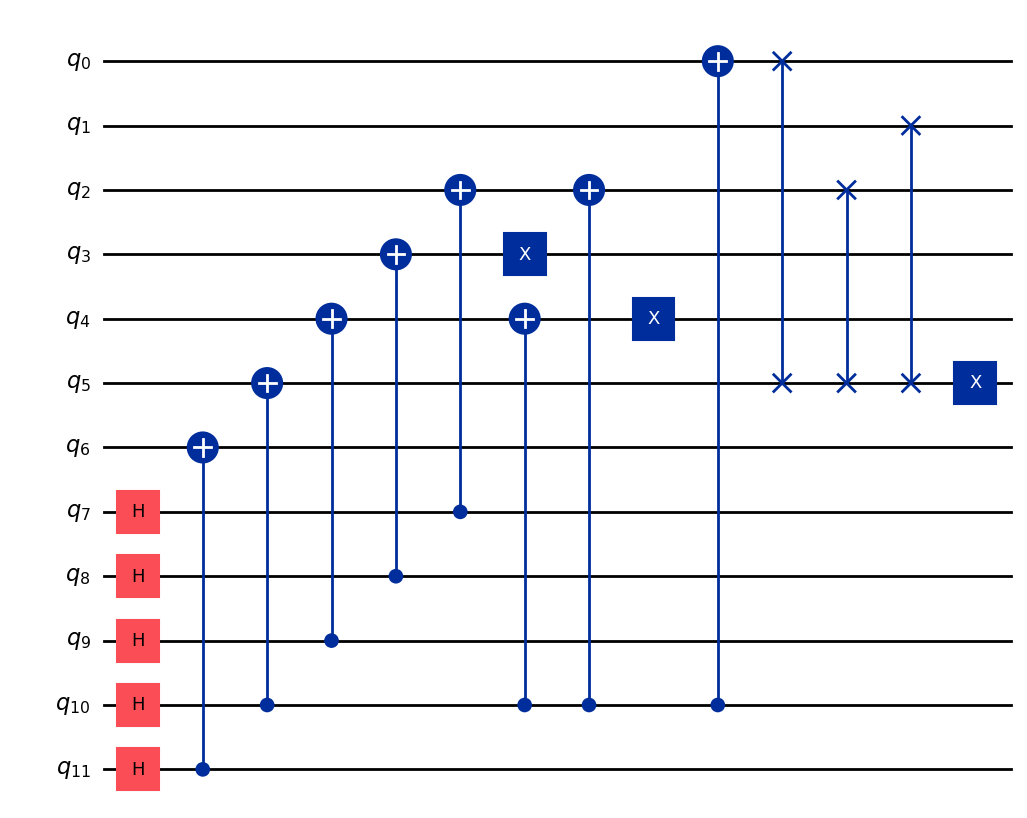

In [47]:
qc.reverse_bits().draw('mpl')